# PROBLEM 1

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [6]:
#reading the data
df=pd.read_csv('Consumo_cerveja.csv')
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000
mean,0.284932,25.401367
std,0.452001,4.399143
min,0.000000,14.343000
25%,0.000000,22.008000
50%,0.000000,24.867000
75%,1.000000,28.631000
max,1.000000,37.937000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [9]:
df.shape

(941, 7)

In [10]:
#removing nan values and duplicate values
df=df.dropna(axis=0).reset_index(drop=True)
df.drop_duplicates()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


In [11]:
#converting the data into float
import re
for column in ['Temperatura Media (C)','Temperatura Minima (C)','Temperatura Maxima (C)','Precipitacao (mm)']:
    df[column]=df[column].apply(lambda x: np.float(re.sub(r',','.',x)))

In [12]:
#splitting data to month year and day
df["Data"]=pd.to_datetime(df["Data"])
df["Year"]=df["Data"].apply(lambda x: x.year)
df["Month"]=df["Data"].apply(lambda x: x.month)
df["Day"]=df["Data"].apply(lambda x: x.day)
df=df.drop("Data",axis=1)

In [13]:
df.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Year,Month,Day
0,27.30,23.9,32.5,0.0,0.0,25.461,2015,1,1
1,27.02,24.5,33.5,0.0,0.0,28.972,2015,1,2
2,24.82,22.4,29.9,0.0,1.0,30.814,2015,1,3
3,23.98,21.5,28.6,1.2,1.0,29.799,2015,1,4
4,23.82,21.0,28.3,0.0,0.0,28.900,2015,1,5


In [14]:
df.nunique()

Temperatura Media (C)          277
Temperatura Minima (C)         110
Temperatura Maxima (C)         151
Precipitacao (mm)               93
Final de Semana                  2
Consumo de cerveja (litros)    359
Year                             1
Month                           12
Day                             31
dtype: int64

In [15]:
#handling outliers
df.describe(include='all')


,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Year,Month,Day
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367,2015.0,6.526027,15.720548
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143,0.0,3.452584,8.808321
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000,2015.0,1.000000,1.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000,2015.0,4.000000,8.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000,2015.0,7.000000,16.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000,2015.0,10.000000,23.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000,2015.0,12.000000,31.000000


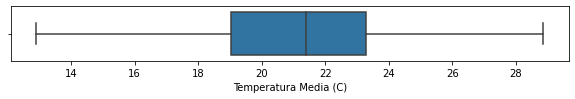

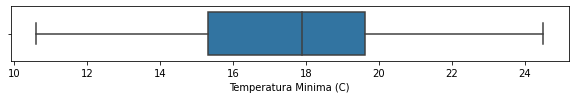

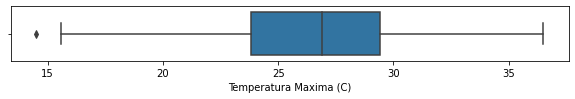

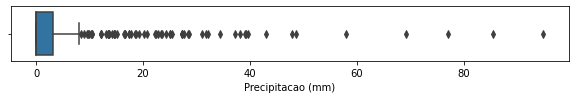

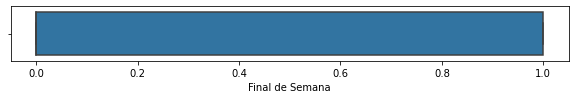

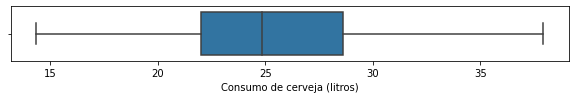

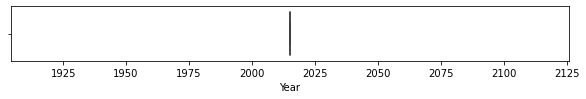

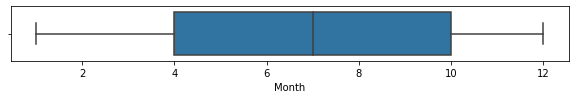

In [16]:
#outliers
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,1))
    sns.boxplot(x=(column),data=df)

In [17]:
#plotting and analyzing corelation



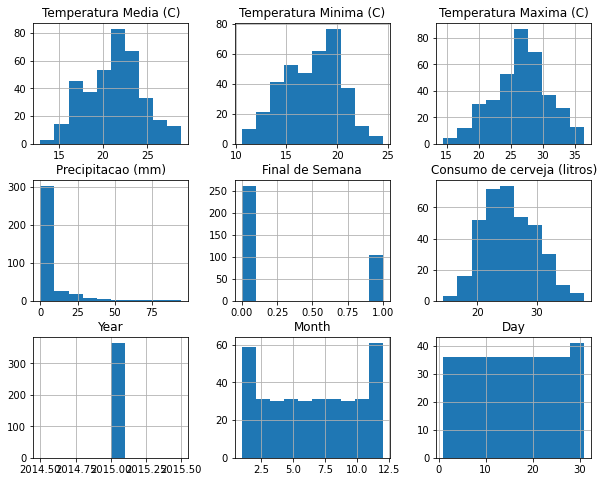

In [18]:
corelation=df.corr(method='pearson')
corelation
plot=df.hist(figsize=(10,8))


In [19]:
#data splitting and training and testing
#splitting
X=df.drop("Consumo de cerveja (litros)",axis=1).copy()
Y=df["Consumo de cerveja (litros)"].copy()



In [20]:
X                              

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Year,Month,Day
0,27.30,23.9,32.5,0.0,0.0,2015,1,1
1,27.02,24.5,33.5,0.0,0.0,2015,1,2
2,24.82,22.4,29.9,0.0,1.0,2015,1,3
3,23.98,21.5,28.6,1.2,1.0,2015,1,4
4,23.82,21.0,28.3,0.0,0.0,2015,1,5
...,...,...,...,...,...,...,...,...
360,24.00,21.1,28.2,13.6,1.0,2015,12,27
361,22.64,21.1,26.7,0.0,0.0,2015,12,28
362,21.68,20.3,24.1,10.3,0.0,2015,12,29
363,21.38,19.3,22.4,6.3,0.0,2015,12,30


In [21]:
Y


0      25.461
1      28.972
2      30.814
3      29.799
4      28.900
        ...  
360    32.307
361    26.095
362    22.309
363    20.467
364    22.446
Name: Consumo de cerveja (litros), Length: 365, dtype: float64

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=24)

In [23]:

#feature scaling
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [26]:
#LR
regressor=LinearRegression()
regressor.fit(X_train,y_train)
print(regressor.intercept_)
print(regressor.coef_)


25.55133606557377
[-3.10342010e-01  1.81660610e-01  2.79429927e+00 -6.69461945e-01
  2.44604248e+00 -8.88178420e-16  2.64216219e-01 -8.87725270e-02]
